In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('project.csv', encoding= 'unicode_escape')

In [3]:
raw_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [55]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [4]:
raw_data.describe(include = 'all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,1430,1464,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,135,130,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,14806.29199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,12823.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,38467.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


In [5]:
num_var = raw_data[['Sales','Discount','Profit','Quantity','Shipping Cost']]
num_var['Shipping cost per unit'] = num_var['Shipping Cost']/num_var['Quantity']
num_var.head()

C:\Users\Kumar Suyash Rituraj\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sales,Discount,Profit,Quantity,Shipping Cost,Shipping cost per unit
0,408.300,0.0,106.140,2,35.46,17.730000
1,120.366,0.1,36.036,3,9.72,3.240000
2,66.120,0.0,29.640,4,8.17,2.042500
3,44.865,0.5,-26.055,3,4.82,1.606667
4,113.670,0.1,37.770,5,4.70,0.940000


In [6]:
num_var.describe()

,Sales,Discount,Profit,Quantity,Shipping Cost,Shipping cost per unit
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,0.142908,28.610982,3.476545,26.375915,7.777093
std,487.565361,0.212280,174.340972,2.278766,57.296804,14.755042
min,0.444000,0.000000,-6599.978000,1.000000,0.000000,0.000000
25%,30.758625,0.000000,0.000000,2.000000,2.610000,1.000000
50%,85.053000,0.000000,9.240000,3.000000,7.790000,2.740000
75%,251.053200,0.200000,36.810000,5.000000,24.450000,7.958750
max,22638.480000,0.850000,8399.976000,14.000000,933.570000,363.870000


In [8]:
q1 = num_var['Sales'].quantile(0.75)
num_var1 = num_var[num_var['Sales']<q1]
num_var1.describe()

,Sales,Discount,Profit,Quantity,Shipping Cost,Shipping cost per unit
count,38467.000000,38467.000000,38467.000000,38467.000000,38467.000000,38467.000000
mean,73.273322,0.154719,5.382185,3.102036,8.030954,3.295776
std,63.188531,0.225463,39.275098,2.045513,9.666714,4.785583
min,0.444000,0.000000,-1144.116000,1.000000,0.000000,0.000000
25%,22.920000,0.000000,-0.595000,2.000000,1.900000,0.750000
50%,51.360000,0.000000,6.180000,3.000000,4.670000,1.730000
75%,108.240000,0.200000,18.960000,4.000000,10.500000,3.845000
max,251.010000,0.850000,125.280000,14.000000,106.810000,93.240000


In [9]:
q2 = num_var1['Shipping cost per unit'].quantile(0.75)
num_var2 = num_var1[num_var1['Shipping cost per unit']<q2]
num_var2.describe()

,Sales,Discount,Profit,Quantity,Shipping Cost,Shipping cost per unit
count,28845.000000,28845.000000,28845.000000,28845.000000,28845.000000,28845.000000
mean,54.636245,0.165917,3.972449,3.352262,4.520189,1.404613
std,50.987016,0.233420,30.227602,2.153933,4.473459,0.995133
min,0.444000,0.000000,-538.128000,1.000000,0.000000,0.000000
25%,17.880000,0.000000,-1.440000,2.000000,1.410000,0.576250
50%,37.392000,0.000000,4.740000,3.000000,3.070000,1.156667
75%,74.400000,0.300000,13.882800,4.000000,6.200000,2.090000
max,251.010000,0.800000,125.280000,14.000000,49.230000,3.843333


In [14]:
q3 = num_var2['Profit'].quantile(0.20)
num_var3 = num_var2[num_var2['Profit']>q3]
num_var3.describe()

,Sales,Discount,Profit,Quantity,Shipping Cost,Shipping cost per unit
count,23075.000000,23075.000000,23075.000000,23075.000000,23075.000000,23075.000000
mean,54.786325,0.077235,13.109702,3.307692,4.516675,1.413580
std,51.067904,0.150790,16.809638,2.108167,4.451794,0.995646
min,0.444000,0.000000,-4.832000,1.000000,0.000000,0.000000
25%,17.880000,0.000000,2.640000,2.000000,1.410000,0.585000
50%,37.584000,0.000000,7.470000,3.000000,3.080000,1.170000
75%,74.640000,0.100000,17.280000,4.000000,6.210000,2.105000
max,251.010000,0.800000,125.280000,14.000000,49.230000,3.843333


In [16]:
p3 = num_var3['Profit'].quantile(0.80)
num_var4 = num_var3[num_var3['Profit']<p3]
num_var4.describe()

,Sales,Discount,Profit,Quantity,Shipping Cost,Shipping cost per unit
count,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000
mean,38.833723,0.090539,6.343827,2.939924,3.452191,1.266794
std,36.087781,0.163068,6.052818,1.867262,3.423872,0.949490
min,0.444000,0.000000,-4.832000,1.000000,0.000000,0.000000
25%,14.940000,0.000000,1.800000,2.000000,1.170000,0.505000
50%,28.266000,0.000000,5.250000,2.000000,2.400000,1.000000
75%,49.470000,0.170000,10.350000,4.000000,4.550000,1.850000
max,250.740000,0.800000,21.024000,14.000000,33.530000,3.842500


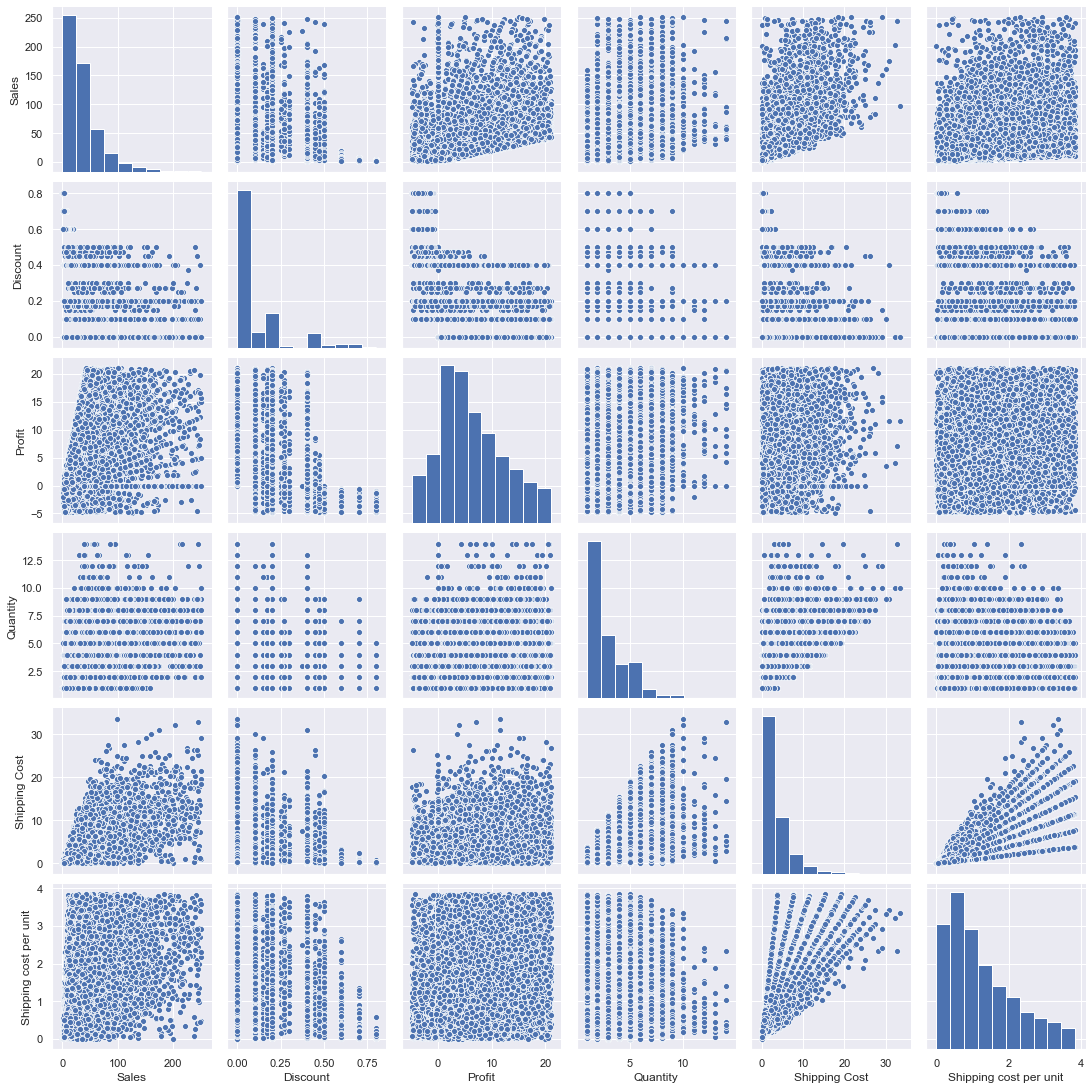

In [17]:
sns.pairplot(num_var4)
plt.show()

In [18]:
num_var4.isnull().sum()

Sales                     0
Discount                  0
Profit                    0
Quantity                  0
Shipping Cost             0
Shipping cost per unit    0
dtype: int64

In [21]:
numeric = num_var4

In [57]:
pred = pd.concat([numeric, raw_data['Market'], raw_data['Ship Mode'],raw_data['Segment'],raw_data['Category'],raw_data['Sub-Category'],raw_data['Order Priority']],axis = 1)
pred.head()

,Sales,Discount,Profit,Quantity,Shipping Cost,Shipping cost per unit,Market,Ship Mode,Segment,Category,Sub-Category,Order Priority
0,NaN,NaN,NaN,NaN,NaN,NaN,Africa,Standard Class,Consumer,Office Supplies,Storage,Medium
1,NaN,NaN,NaN,NaN,NaN,NaN,APAC,Standard Class,Consumer,Office Supplies,Supplies,Medium
2,NaN,NaN,NaN,NaN,NaN,NaN,EMEA,Second Class,Consumer,Office Supplies,Storage,High
3,NaN,NaN,NaN,NaN,NaN,NaN,EU,Second Class,Home Office,Office Supplies,Paper,High
4,NaN,NaN,NaN,NaN,NaN,NaN,APAC,Standard Class,Consumer,Furniture,Furnishings,Medium


In [58]:
pred.dropna(inplace = True)

In [59]:
pred.isnull().sum()

Sales                     0
Discount                  0
Profit                    0
Quantity                  0
Shipping Cost             0
Shipping cost per unit    0
Market                    0
Ship Mode                 0
Segment                   0
Category                  0
Sub-Category              0
Order Priority            0
dtype: int64

In [60]:
pred.describe(include = 'all')

,Sales,Discount,Profit,Quantity,Shipping Cost,Shipping cost per unit,Market,Ship Mode,Segment,Category,Sub-Category,Order Priority
count,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460,18460,18460,18460,18460,18460
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,4,3,3,17,4
top,NaN,NaN,NaN,NaN,NaN,NaN,US,Standard Class,Consumer,Office Supplies,Binders,Medium
freq,NaN,NaN,NaN,NaN,NaN,NaN,4806,11812,9554,16104,3825,11447
mean,38.833723,0.090539,6.343827,2.939924,3.452191,1.266794,NaN,NaN,NaN,NaN,NaN,NaN
std,36.087781,0.163068,6.052818,1.867262,3.423872,0.949490,NaN,NaN,NaN,NaN,NaN,NaN
min,0.444000,0.000000,-4.832000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,14.940000,0.000000,1.800000,2.000000,1.170000,0.505000,NaN,NaN,NaN,NaN,NaN,NaN
50%,28.266000,0.000000,5.250000,2.000000,2.400000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,49.470000,0.170000,10.350000,4.000000,4.550000,1.850000,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
market = pd.get_dummies(pred['Market'])

In [62]:
ship = pd.get_dummies(pred['Ship Mode'])

In [63]:
segment = pd.get_dummies(pred['Segment'])

In [64]:
category = pd.get_dummies(pred['Category'])

In [65]:
sub_category = pd.get_dummies(pred['Sub-Category'])

In [66]:
order_priority = pd.get_dummies(pred['Order Priority'])

In [67]:
pre_final = pd.concat([pred,market, ship, segment, category, sub_category, order_priority], axis = 1)
pre_final.head()

,Sales,Discount,Profit,Quantity,Shipping Cost,Shipping cost per unit,Market,Ship Mode,Segment,Category,...,Machines,Paper,Phones,Storage,Supplies,Tables,Critical,High,Low,Medium
5,55.242,0.1,15.342,2.0,1.80,0.900,APAC,Standard Class,Consumer,Office Supplies,...,0,1,0,0,0,0,0,0,0,1
14,40.680,0.0,11.790,3.0,11.13,3.710,APAC,Second Class,Consumer,Office Supplies,...,0,0,0,0,1,0,1,0,0,0
16,78.300,0.0,20.340,3.0,6.03,2.010,EU,Standard Class,Consumer,Office Supplies,...,0,0,0,0,0,0,0,0,0,1
17,22.650,0.0,9.600,5.0,5.29,1.058,APAC,Second Class,Consumer,Office Supplies,...,0,0,0,0,0,0,1,0,0,0
18,20.340,0.0,9.900,3.0,3.78,1.260,APAC,Second Class,Consumer,Office Supplies,...,0,0,0,0,0,0,1,0,0,0


In [69]:
pre_final1 = pre_final.drop(pre_final.columns[6:12], axis = 1)
pre_final1.head()

,Sales,Discount,Profit,Quantity,Shipping Cost,Shipping cost per unit,APAC,Africa,Canada,EMEA,...,Machines,Paper,Phones,Storage,Supplies,Tables,Critical,High,Low,Medium
5,55.242,0.1,15.342,2.0,1.80,0.900,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
14,40.680,0.0,11.790,3.0,11.13,3.710,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
16,78.300,0.0,20.340,3.0,6.03,2.010,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,22.650,0.0,9.600,5.0,5.29,1.058,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18,20.340,0.0,9.900,3.0,3.78,1.260,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
indep = pre_final1.drop(pre_final.columns[4], axis = 1)

indep.head()

,Sales,Discount,Profit,Quantity,Shipping cost per unit,APAC,Africa,Canada,EMEA,EU,...,Machines,Paper,Phones,Storage,Supplies,Tables,Critical,High,Low,Medium
5,55.242,0.1,15.342,2.0,0.900,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
14,40.680,0.0,11.790,3.0,3.710,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
16,78.300,0.0,20.340,3.0,2.010,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
17,22.650,0.0,9.600,5.0,1.058,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18,20.340,0.0,9.900,3.0,1.260,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
independent = indep.drop(indep.columns[4], axis = 1)
independent.head()

,Sales,Discount,Profit,Quantity,APAC,Africa,Canada,EMEA,EU,LATAM,...,Machines,Paper,Phones,Storage,Supplies,Tables,Critical,High,Low,Medium
5,55.242,0.1,15.342,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
14,40.680,0.0,11.790,3.0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
16,78.300,0.0,20.340,3.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
17,22.650,0.0,9.600,5.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18,20.340,0.0,9.900,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
y = pre_final1['Shipping cost per unit']
x1 = independent

import statsmodels.api as sm

x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Shipping cost per unit   R-squared:                       0.541
Model:                                OLS   Adj. R-squared:                  0.540
Method:                     Least Squares   F-statistic:                     638.6
Date:                    Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                            16:42:15   Log-Likelihood:                -18050.
No. Observations:                   18460   AIC:                         3.617e+04
Df Residuals:                       18425   BIC:                         3.644e+04
Df Model:                              34                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7539      0.015     51.281      0.000       0.725       0.783
Sales               0.0137      0.000     72.200      0.000       0.013       0.014
Discount           -0.4013      0.034    -11.977      0.000      -0.467      -0.336
Profit              0.0190      0.001     19.905      0.000       0.017       0.021
Quantity           -0.1913      0.003    -58.662      0.000      -0.198      -0.185
APAC                0.1652      0.013     12.509      0.000       0.139       0.191
Africa              0.2585      0.016     15.980      0.000       0.227       0.290
Canada              0.1537      0.044      3.519      0.000       0.068       0.239
EMEA                0.2066      0.016     12.796      0.000       0.175       0.238
EU                  0.1373      0.013     10.366      0.000       0.111       0.163
LATAM               0.0378      0.012      3.098      0.002       0.014       0.062
US                 -0.2050      0.013    -16.095      0.000      -0.230      -0.180
First Class         0.3295      0.013     26.003      0.000       0.305       0.354
Same Day            0.3171      0.018     17.259      0.000       0.281       0.353
Second Class        0.1384      0.011     12.685      0.000       0.117       0.160
Standard Class     -0.0311      0.010     -3.232      0.001      -0.050      -0.012
Consumer            0.2479      0.008     31.687      0.000       0.233       0.263
Corporate           0.2478      0.009     28.554      0.000       0.231       0.265
Home Office         0.2583      0.010     26.239      0.000       0.239       0.278
Furniture           0.4475      0.047      9.573      0.000       0.356       0.539
Office Supplies     0.2006      0.024      8.378      0.000       0.154       0.248
Technology          0.1057      0.037      2.824      0.005       0.032       0.179
Accessories         0.4192      0.053      7.979      0.000       0.316       0.522
Appliances          0.3268      0.041      7.995      0.000       0.247       0.407
Art                 0.0707      0.014      5.192      0.000       0.044       0.097
Binders            -0.1608      0.012    -13.260      0.000      -0.185      -0.137
Bookcases          -0.0840      0.130     -0.646      0.518      -0.339       0.171
Chairs              0.1661      0.073      2.278      0.023       0.023       0.309
Copiers            -1.1653      0.162     -7.176      0.000      -1.484      -0.847
Envelopes           0.0428      0.018      2.417      0.016       0.008       0.077
Fasteners          -0.1264      0.016     -8.065      0.000      -0.157      -0.096
Furnishings        -0.0527      0.067     -0.783      0.434      -0.185       0.079
Labels             -0.2671      0.015    -17.726      0.000      -0.297      -0.238
Machines       